In [1]:
from pathlib import Path
persist_path = Path('..') / 'persist'
import pandas as pd

In [2]:
day_orders = pd.read_pickle(persist_path / 'day_order.pkl')
day_orders

indicators                    weight                    margin               \
origin2                          EDI       TV   VR  WEB    EDI      TV   VR   
orgacom client     date                                                       
1ALO    0000015304 2017-07-03    0.0  190.642  0.0  0.0    0.0  202.80  0.0   
                   2017-07-04    0.0   24.200  0.0  0.0    0.0   33.70  0.0   
                   2017-07-05    0.0  112.550  0.0  0.0    0.0   86.73  0.0   
                   2017-07-06    0.0    6.200  0.0  0.0    0.0   17.55  0.0   
                   2017-07-07    0.0   27.000  0.0  0.0    0.0   13.77  0.0   
...                              ...      ...  ...  ...    ...     ...  ...   
2BRE    SL009N     2020-08-26    0.0    0.000  0.0  0.0    0.0    0.00  0.0   
                   2020-08-27    0.0  103.950  0.0  0.0    0.0   61.10  0.0   
                   2020-08-28    0.0    0.000  0.0  0.0    0.0    0.00  0.0   
                   2020-08-31    0.0   40.500  0.0  0.0    0.0   10.51  0.0   
        SLD008B    2018-09-14    0.0    4.400  0.0  0.0    0.0    3.82  0.0   

indicators                         brutrevenue                     
origin2                        WEB         EDI       TV   VR  WEB  
orgacom client     date                                            
1ALO    0000015304 2017-07-03  0.0         0.0  1340.95  0.0  0.0  
                   2017-07-04  0.0         0.0   196.54  0.0  0.0  
                   2017-07-05  0.0         0.0   916.78  0.0  0.0  
                   2017-07-06  0.0         0.0    73.36  0.0  0.0  
                   2017-07-07  0.0         0.0    73.17  0.0  0.0  
...                            ...         ...      ...  ...  ...  
2BRE    SL009N     2020-08-26  0.0         0.0     0.00  0.0  0.0  
                   2020-08-27  0.0         0.0   629.91  0.0  0.0  
                   2020-08-28  0.0         0.0     0.00  0.0  0.0  
                   2020-08-31  0.0         0.0    75.03  0.0  0.0  
        SLD008B    2018-09-14  0.0         0.0    70.05  0.0  0.0  

[15650027 rows x 12 columns]

In [3]:
%%time
day_orders = (
    day_orders.join(
        pd.concat([day_orders.groupby('indicators', axis=1).sum()], keys=['total'], axis=1).swaplevel(axis=1)
    ).sort_index(axis=1)
)
day_orders

CPU times: user 12.8 s, sys: 8.9 s, total: 21.7 s
Wall time: 21.7 s


indicators                    brutrevenue                             margin  \
origin2                               EDI       TV   VR  WEB    total    EDI   
orgacom client     date                                                        
1ALO    0000015304 2017-07-03         0.0  1340.95  0.0  0.0  1340.95    0.0   
                   2017-07-04         0.0   196.54  0.0  0.0   196.54    0.0   
                   2017-07-05         0.0   916.78  0.0  0.0   916.78    0.0   
                   2017-07-06         0.0    73.36  0.0  0.0    73.36    0.0   
                   2017-07-07         0.0    73.17  0.0  0.0    73.17    0.0   
...                                   ...      ...  ...  ...      ...    ...   
2BRE    SL009N     2020-08-26         0.0     0.00  0.0  0.0     0.00    0.0   
                   2020-08-27         0.0   629.91  0.0  0.0   629.91    0.0   
                   2020-08-28         0.0     0.00  0.0  0.0     0.00    0.0   
                   2020-08-31         0.0    75.03  0.0  0.0    75.03    0.0   
        SLD008B    2018-09-14         0.0    70.05  0.0  0.0    70.05    0.0   

indicators                                              weight                \
origin2                            TV   VR  WEB   total    EDI       TV   VR   
orgacom client     date                                                        
1ALO    0000015304 2017-07-03  202.80  0.0  0.0  202.80    0.0  190.642  0.0   
                   2017-07-04   33.70  0.0  0.0   33.70    0.0   24.200  0.0   
                   2017-07-05   86.73  0.0  0.0   86.73    0.0  112.550  0.0   
                   2017-07-06   17.55  0.0  0.0   17.55    0.0    6.200  0.0   
                   2017-07-07   13.77  0.0  0.0   13.77    0.0   27.000  0.0   
...                               ...  ...  ...     ...    ...      ...  ...   
2BRE    SL009N     2020-08-26    0.00  0.0  0.0    0.00    0.0    0.000  0.0   
                   2020-08-27   61.10  0.0  0.0   61.10    0.0  103.950  0.0   
                   2020-08-28    0.00  0.0  0.0    0.00    0.0    0.000  0.0   
                   2020-08-31   10.51  0.0  0.0   10.51    0.0   40.500  0.0   
        SLD008B    2018-09-14    3.82  0.0  0.0    3.82    0.0    4.400  0.0   

indicators                                   
origin2                        WEB    total  
orgacom client     date                      
1ALO    0000015304 2017-07-03  0.0  190.642  
                   2017-07-04  0.0   24.200  
                   2017-07-05  0.0  112.550  
                   2017-07-06  0.0    6.200  
                   2017-07-07  0.0   27.000  
...                            ...      ...  
2BRE    SL009N     2020-08-26  0.0    0.000  
                   2020-08-27  0.0  103.950  
                   2020-08-28  0.0    0.000  
                   2020-08-31  0.0   40.500  
        SLD008B    2018-09-14  0.0    4.400  

[15650027 rows x 15 columns]

Empty DataFrame
Columns: [(brutrevenue, EDI), (brutrevenue, TV), (brutrevenue, VR), (brutrevenue, WEB), (brutrevenue, total), (margin, EDI), (margin, TV), (margin, VR), (margin, WEB), (margin, total), (weight, EDI), (weight, TV), (weight, VR), (weight, WEB), (weight, total)]
Index: []

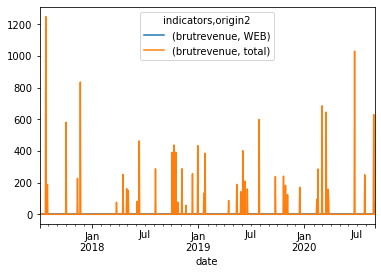

In [17]:
smol_data = day_orders.loc[('2BRE', 'SL009N')]
smol_data[[('brutrevenue', 'WEB'), ('brutrevenue', 'total')]].plot(kind='line')
smol_data.loc[smol_data[('brutrevenue', 'WEB')] != 0]

In [20]:
smol_data[('brutrevenue', 'WEB')].rolling(5, win_type='triang').mean()

date
2017-07-04    NaN
2017-07-05    NaN
2017-07-06    NaN
2017-07-07    NaN
2017-07-10    0.0
             ... 
2020-08-25    0.0
2020-08-26    0.0
2020-08-27    0.0
2020-08-28    0.0
2020-08-31    0.0
Name: (brutrevenue, WEB), Length: 825, dtype: float64

<AxesSubplot:xlabel='date'>

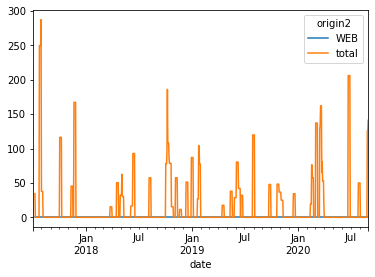

In [12]:
rolled.loc[('2BRE', 'SL009N')].plot(kind='line')

In [21]:
%%time
in_df = day_orders.tail(50000)
rolled = (
    in_df.loc[:, ('brutrevenue')].loc[:, ['WEB', 'total']]
        .groupby(['orgacom', 'client'], observed=True)
        .rolling(5, win_type='boxcar')
        .mean()    
        .reset_index()
        .drop(['orgacom', 'client'], axis=1)
)

rolled[['orgacom', 'client', 'date']] = rolled.level_2.to_list()
rolled = rolled.drop('level_2', axis=1).set_index(['orgacom', 'client', 'date'])
rolled

CPU times: user 1.3 s, sys: 10.5 ms, total: 1.31 s
Wall time: 1.31 s


origin2                              WEB         total
orgacom client  date                                  
2BRE    P020036 2019-03-25           NaN           NaN
                2019-03-26           NaN           NaN
                2019-03-27           NaN           NaN
                2019-03-28           NaN           NaN
                2019-03-29  0.000000e+00  0.000000e+00
...                                  ...           ...
        SL009N  2020-08-26  5.684342e-15  8.185452e-13
                2020-08-27  5.684342e-15  1.259820e+02
                2020-08-28  5.684342e-15  1.259820e+02
                2020-08-31  5.684342e-15  1.409880e+02
        SLD008B 2018-09-14           NaN           NaN

[50000 rows x 2 columns]

In [ ]:
rolled['percentage'] = rolled['WEB'] / rolled['total']
rolled

In [13]:
rolled.loc[rolled.WEB > 0]

origin2                              WEB         total
orgacom client  date                                  
2BRE    P020036 2019-05-02  1.287000e+01  1.287000e+01
                2019-05-03  1.287000e+01  1.287000e+01
                2019-05-06  1.287000e+01  1.287000e+01
                2019-05-07  1.287000e+01  1.287000e+01
                2019-05-08  1.287000e+01  1.287000e+01
...                                  ...           ...
        SL009N  2020-08-25  5.684342e-15  8.185452e-13
                2020-08-26  5.684342e-15  8.185452e-13
                2020-08-27  5.684342e-15  1.259820e+02
                2020-08-28  5.684342e-15  1.259820e+02
                2020-08-31  5.684342e-15  1.409880e+02

[40557 rows x 2 columns]

In [ ]:
orders = pd.read_pickle(persist_path / 'orders.pkl')

In [ ]:
rolled.loc[('2BRE', 'SL009N')]

In [ ]:
day_orders.loc[('2BRE', 'SL009N')].rolling(5, win_type='triang').mean()

In [ ]:
orders.loc[('2BRE', 'SL009N'), ['origin2', 'brutrevenue']]